# 🎯 Santander Customer Transaction Prediction: A Beginner's Guide
# Author: Jerónimo Guerra
# Competition: Santander Customer Transaction Prediction

In [1]:
import os
print(os.getcwd())  # This will show your current working directory
print(os.listdir()) # This will show files in your current directory

/kaggle/working
['__notebook__.ipynb']


In [2]:
# 1. Import required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Define the path to your data files
# You'll need to replace this with your actual path
competition_path = "santander-customer-transaction-prediction"  # or the full path to your competition folder

# Verify and print the files in the directory
print("📂 Files in directory:")
print(os.listdir())

# 2. Load the data with explicit path
print("\n📊 Loading data...")
try:
    train = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
    test = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ Error: Cannot find the CSV files!")
    print("\nPlease make sure you:")
    print("1. Have 'train.csv' and 'test.csv' in your current directory")
    print("2. Are running this notebook in the same directory as your data files")
    print("\nCurrent working directory:", os.getcwd())
    raise


📂 Files in directory:
['__notebook__.ipynb']

📊 Loading data...
✅ Data loaded successfully!



🔍 Basic Data Information:
--------------------------------------------------
Training Data Shape: (200000, 202)
Test Data Shape: (200000, 201)


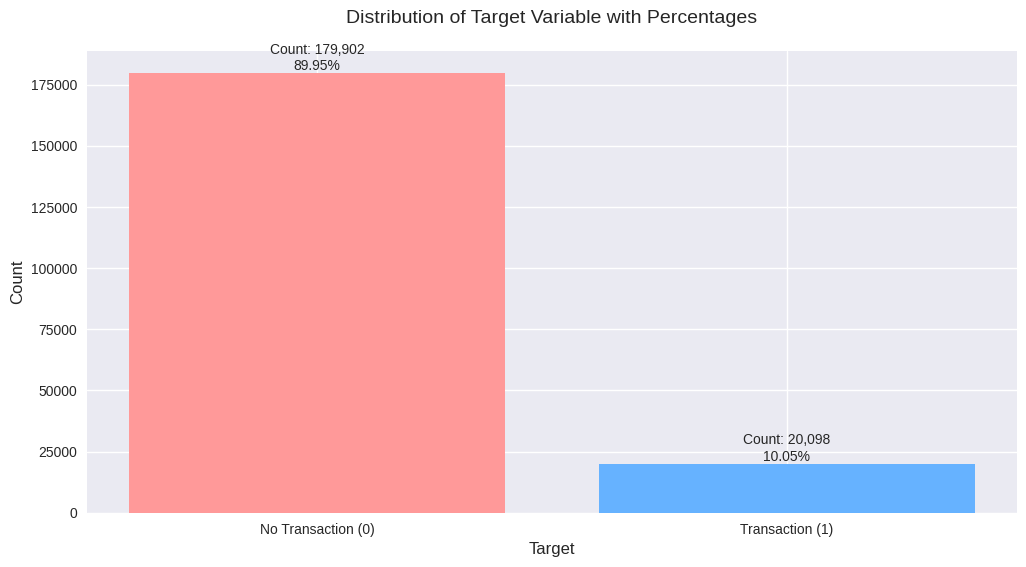

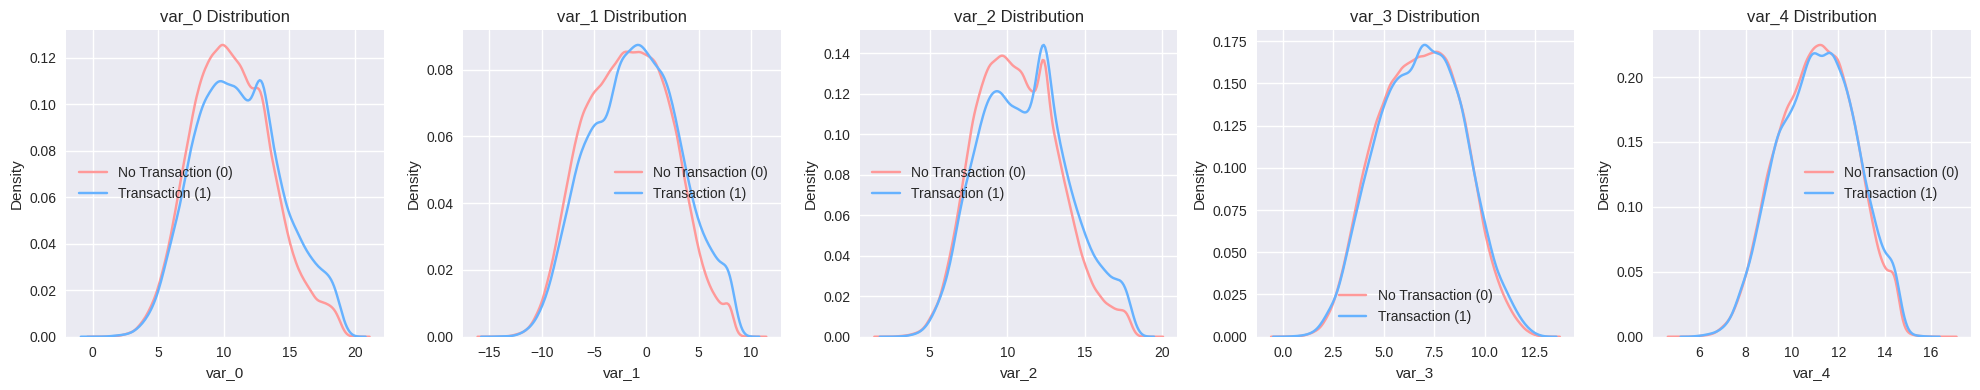

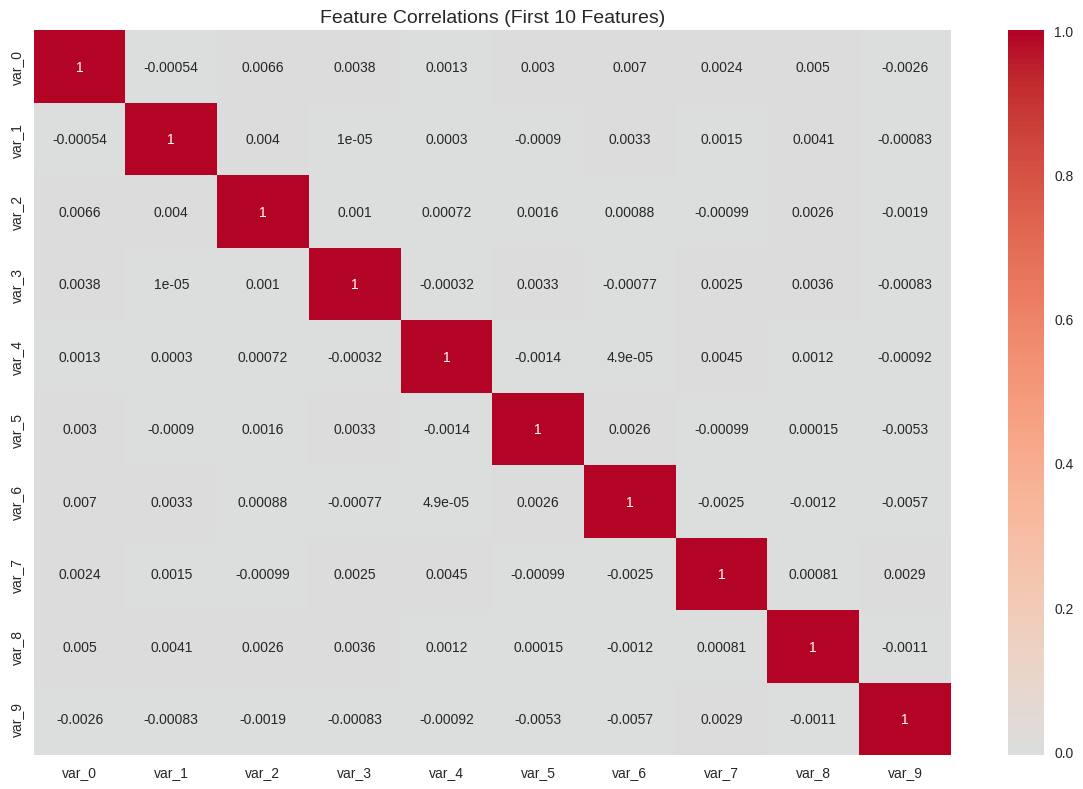


🔧 Preparing data for modeling...

🤖 Training Random Forest model...

📊 Evaluating model...
Validation AUC-ROC Score: 0.8047


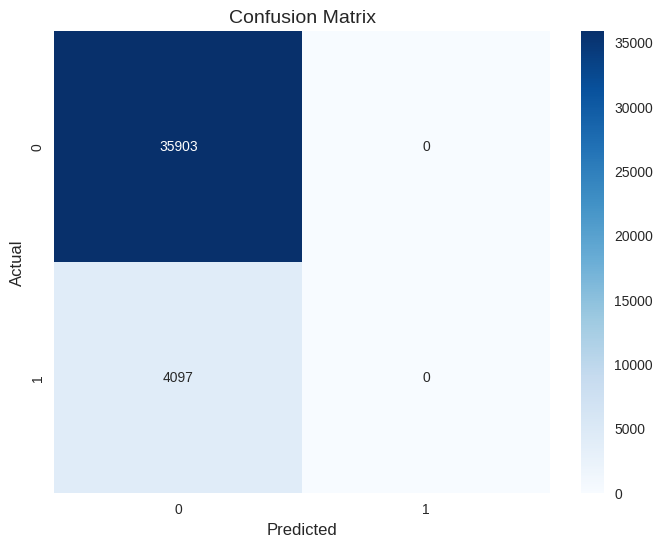

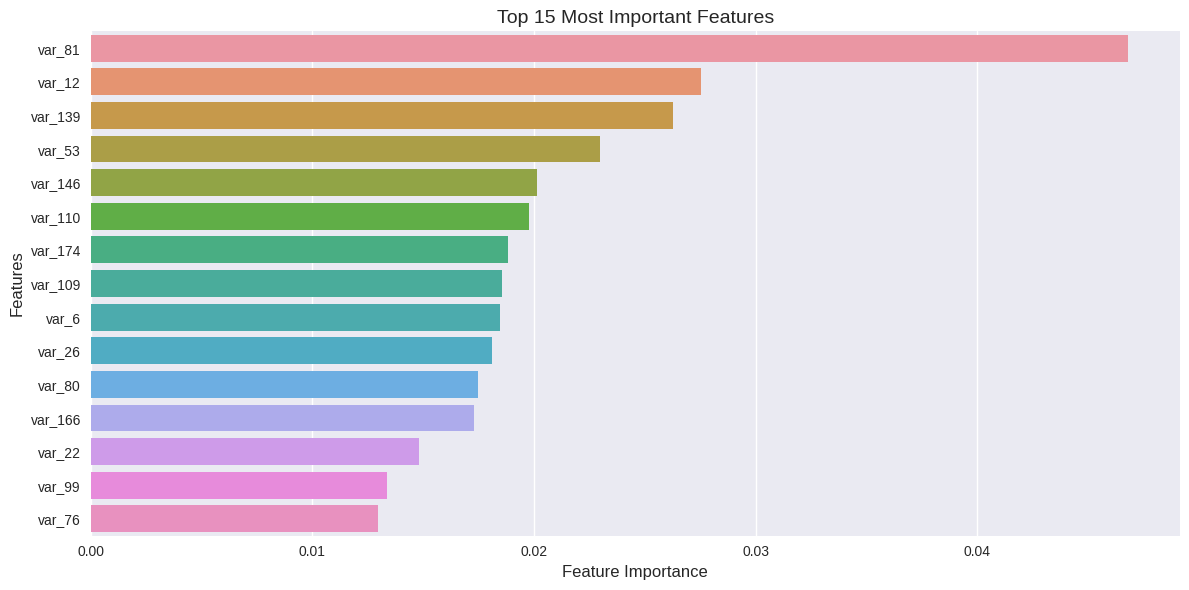


🎯 Making predictions on test set...

📝 Creating submission file...

✨ Analysis Complete! ✨

📊 Key Metrics and Insights:
--------------------------------------------------
Model AUC-ROC Score: 0.8047
Number of features: 200
Training samples: 160000
Validation samples: 40000

Target Distribution:
- Class 0: 179,902 samples (89.95%)
- Class 1: 20,098 samples (10.05%)


In [3]:
print("\n🔍 Basic Data Information:")
print("-" * 50)
print("Training Data Shape:", train.shape)
print("Test Data Shape:", test.shape)

# 3. Enhanced Data Visualization

# 3.1 Target Distribution with Percentages
plt.figure(figsize=(12, 6))
target_counts = train['target'].value_counts()
target_percentages = (target_counts / len(train) * 100).round(2)

colors = ['#FF9999', '#66B2FF']
ax = plt.bar(range(len(target_counts)), target_counts, color=colors)

for i, (count, percentage) in enumerate(zip(target_counts, target_percentages)):
    plt.text(i, count, f'Count: {count:,}\n{percentage:.2f}%', 
             ha='center', va='bottom')

plt.title('Distribution of Target Variable with Percentages', fontsize=14, pad=20)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Transaction (0)', 'Transaction (1)'])
plt.show()

# 3.2 Feature Distribution Analysis
plt.figure(figsize=(20, 4))
features = train.drop(['ID_code', 'target'], axis=1).columns[:5]

for i, feature in enumerate(features, 1):
    plt.subplot(1, 5, i)
    sns.kdeplot(data=train[train['target']==0][feature], 
                label='No Transaction (0)',
                color='#FF9999')
    sns.kdeplot(data=train[train['target']==1][feature], 
                label='Transaction (1)',
                color='#66B2FF')
    plt.title(f'{feature} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

# 3.3 Feature Correlations
plt.figure(figsize=(12, 8))
correlations = train.drop(['ID_code', 'target'], axis=1).iloc[:, :10].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations (First 10 Features)', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Data Preparation
print("\n🔧 Preparing data for modeling...")
X = train.drop(['ID_code', 'target'], axis=1)
y = train['target']
test_features = test.drop(['ID_code'], axis=1)

# Split and scale data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 5. Model Training
print("\n🤖 Training Random Forest model...")
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)

# 6. Model Evaluation
print("\n📊 Evaluating model...")
val_predictions = model.predict_proba(X_val_scaled)[:, 1]
val_auc = roc_auc_score(y_val, val_predictions)
print(f"Validation AUC-ROC Score: {val_auc:.4f}")

# 6.1 Confusion Matrix
val_pred_binary = (val_predictions > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# 6.2 Feature Importance
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# 7. Make Predictions and Create Submission
print("\n🎯 Making predictions on test set...")
test_scaled = scaler.transform(test_features)
test_predictions = model.predict_proba(test_scaled)[:, 1]

print("\n📝 Creating submission file...")
submission = pd.DataFrame({
    'ID_code': test['ID_code'],
    'target': test_predictions
})
submission.to_csv('submission.csv', index=False)

# 8. Print Final Summary
print("\n✨ Analysis Complete! ✨")
print("\n📊 Key Metrics and Insights:")
print("-" * 50)
print(f"Model AUC-ROC Score: {val_auc:.4f}")
print(f"Number of features: {X.shape[1]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"\nTarget Distribution:")
for target, (count, percentage) in enumerate(zip(target_counts, target_percentages)):
    print(f"- Class {target}: {count:,} samples ({percentage:.2f}%)")


In [4]:
print("\n🚀 Improvement:")

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

# Prepare initial features and target
X = train.drop(['ID_code', 'target'], axis=1)
y = train['target']
X_test = test.drop(['ID_code'], axis=1)

# 1. Feature Engineering
print("\n1. Feature Engineering")
print("-" * 50)

# Create interaction terms
print("Creating interaction terms...")
# Get top correlated features
corr_matrix = X.corr().abs()
top_corr_pairs = np.where(np.triu(corr_matrix, 1) > 0.5)
top_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                     for x, y in zip(*top_corr_pairs)][:5]

X_engineered = X.copy()
X_test_engineered = X_test.copy()

# Add interactions
for feat1, feat2 in top_corr_features:
    feat_name = f'{feat1}_{feat2}_interact'
    X_engineered[feat_name] = X[feat1] * X[feat2]
    X_test_engineered[feat_name] = X_test[feat1] * X_test[feat2]

# Add polynomial features
print("Creating polynomial features...")
# Get top 5 important features using a quick RandomForest
from sklearn.ensemble import RandomForestClassifier
quick_rf = RandomForestClassifier(n_estimators=100, random_state=42)
quick_rf.fit(X, y)
top_features = pd.DataFrame({
    'feature': X.columns,
    'importance': quick_rf.feature_importances_
}).sort_values('importance', ascending=False)['feature'].head().tolist()

for feat in top_features:
    # Square
    X_engineered[f'{feat}_sq'] = X[feat] ** 2
    X_test_engineered[f'{feat}_sq'] = X_test[feat] ** 2
    # Cube
    X_engineered[f'{feat}_cube'] = X[feat] ** 3
    X_test_engineered[f'{feat}_cube'] = X_test[feat] ** 3

# 2. Data Processing
print("\n2. Data Processing")
print("-" * 50)

# Handle outliers and scale
print("Applying robust scaling...")
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_engineered)
X_test_scaled = robust_scaler.transform(X_test_engineered)

# Apply Yeo-Johnson transformation
print("Applying Yeo-Johnson transformation...")
power_transformer = PowerTransformer(method='yeo-johnson')
X_train_transformed = power_transformer.fit_transform(X_train_scaled)
X_test_transformed = power_transformer.transform(X_test_scaled)

# Apply PCA
print("Applying PCA...")
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

print(f"Reduced dimensions from {X_engineered.shape[1]} to {X_train_pca.shape[1]}")

# 3. Model Training
print("\n3. Model Training")
print("-" * 50)

# Create and train XGBoost
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_pca, y, cv=5, scoring='roc_auc')
print("Cross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train final model
xgb_model.fit(X_train_pca, y)

# Make predictions
print("\n4. Making Predictions")
print("-" * 50)
predictions = xgb_model.predict_proba(X_test_pca)[:, 1]

# Create submission
submission = pd.DataFrame({
    'ID_code': test['ID_code'],
    'target': predictions
})
submission.to_csv('improved_submission.csv', index=False)

print("\n✨ Analysis Complete!")
print("-" * 50)
print("Files created:")
print("- improved_submission.csv (Your competition submission file)")
print(f"\nCross-validation AUC-ROC Score: {cv_scores.mean():.4f}")
print(f"Number of features after engineering: {X_engineered.shape[1]}")
print(f"Number of features after PCA: {X_train_pca.shape[1]}")

# Display submission preview
print("\nSubmission Preview:")
print(submission.head())

# Verify submission format
print("\nSubmission Format Check:")
print(f"Shape: {submission.shape}")
print(f"Columns: {submission.columns.tolist()}")
print("Predictions range:", f"[{predictions.min():.3f}, {predictions.max():.3f}]")


🚀 Improvement:

1. Feature Engineering
--------------------------------------------------
Creating interaction terms...
Creating polynomial features...

2. Data Processing
--------------------------------------------------
Applying robust scaling...
Applying Yeo-Johnson transformation...
Applying PCA...
Reduced dimensions from 210 to 190

3. Model Training
--------------------------------------------------
Training XGBoost...
Cross-validation scores: [0.85809067 0.85887636 0.86231928 0.86602173 0.86758165]
Mean CV score: 0.8626 (+/- 0.0075)

4. Making Predictions
--------------------------------------------------

✨ Analysis Complete!
--------------------------------------------------
Files created:
- improved_submission.csv (Your competition submission file)

Cross-validation AUC-ROC Score: 0.8626
Number of features after engineering: 210
Number of features after PCA: 190

Submission Preview:
  ID_code    target
0  test_0  0.261386
1  test_1  0.203709
2  test_2  0.050779
3  test_3  0

In [5]:
# Verify submission format
print("\n📋 Submission File Check:")
print("-" * 50)
print("Submission shape:", submission.shape)
print("\nFirst few rows:")
print(submission.head())
print("\nColumn names:", submission.columns.tolist())


📋 Submission File Check:
--------------------------------------------------
Submission shape: (200000, 2)

First few rows:
  ID_code    target
0  test_0  0.261386
1  test_1  0.203709
2  test_2  0.050779
3  test_3  0.171147
4  test_4  0.079080

Column names: ['ID_code', 'target']
